In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Nastavení parametrů signálu

In [2]:
# --------------------------------------------------------------------------------------------
# [CONFIG START]
fs = 1024 # vzorkovaci frekvence
N = 128 # pocet vzorku

# definice slozek signalu
DC = -3
f1 = 128
f2 = 64
f3 = 32
A1 = -1
A2 = 1
A3 = 2
# [CONFIG END]
# --------------------------------------------------------------------------------------------



# vypocet periody + vygenerovani casove osy
T = 1/fs # perioda
t = np.arange(N)*T # casova osa

# Vygenerování signálu

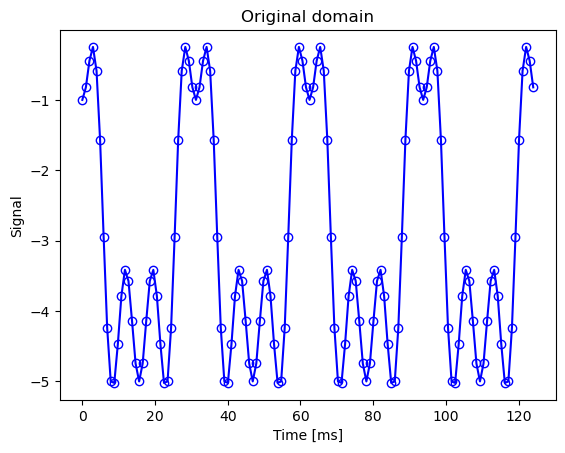

In [3]:
# vygenerovani signalu
signal = DC + A1*np.cos(2*np.pi*f1*t) + A2*np.cos(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)

# zobrazeni signalu (casova osa v ms => * 1000)
plt.title("Original domain")
plt.plot(t * 1000, signal, 'bo-', markerfacecolor='none')
plt.xlabel('Time [ms]')
plt.ylabel('Signal')
plt.show()

# Vygenerování signálu se šumem

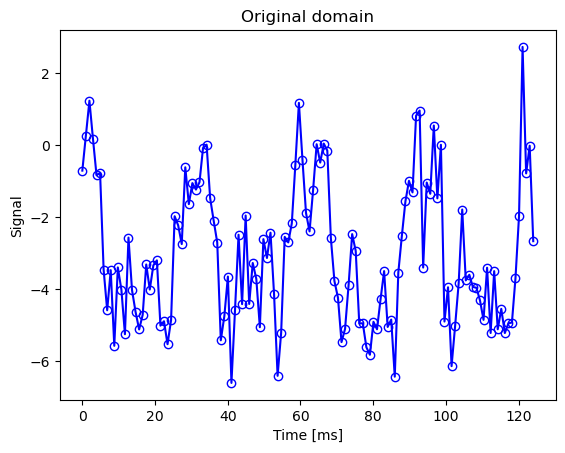

In [4]:
# vygeneruje sum
noise = np.random.normal(loc=0, scale=1, size=len(signal))

# vysledny signal + sum
noisy_signal = signal + noise

# zobrazeni signalu (casova osa v ms => * 1000)
plt.title("Original domain")
plt.plot(t * 1000, noisy_signal, 'bo-', markerfacecolor='none')
plt.xlabel('Time [ms]')
plt.ylabel('Signal')
plt.show()

# Utility

In [6]:
def showOneSidedAmplitudePhaseSpectrum(signal: np.array, N: int, T: float):
    """
    Vypocita a zobrazi jednostranne amplitudove a frekvencni spektrum pro definova signal

    Parametry:
        Signal - vstupni signal
        N - pocet vzorku
        T - Perioda
    """
    # vypocet jednostranneho spektra
    freq = np.fft.rfftfreq(N, T) # frekvencni osa
    spec = np.fft.rfft(signal) # jednostranne spektrum

    # normalizace jednostranneho amplitudoveho spektra
    amp_spec = np.abs(spec)*2/N
    amp_spec[0] = amp_spec[0]/2 

    # zobrazeni jednostranneho amplitudoveho spektra
    markerline, _, _ = plt.stem(freq, amp_spec, linefmt=('r-'), markerfmt=('ro'), basefmt='r-')
    markerline.set_markerfacecolor('none')
    plt.title("Frequency domain - amplitude spectrum (one sided)")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.gca().grid(True, axis='y')
    plt.show()

    # aplikace prahu na spektrum
    threshold = 0.025
    spec[abs(spec) < threshold*np.max(abs(spec))] = 0

    # zobrazeni jednostranneho fazoveho spektra
    phase_spec = np.angle(spec)
    phase_spec = np.rad2deg(phase_spec)
    phase_spec = np.round(phase_spec)
    markerline, _, _ = plt.stem(freq,  phase_spec, linefmt=('r-'), markerfmt=('ro'), basefmt='r-')
    markerline.set_markerfacecolor('none')
    plt.title("Frequency domain - phase spectrum (one sided)")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [deg]')
    plt.yticks(range(0, 181, 45))
    plt.gca().grid(True, axis='y')
    plt.show()

In [7]:
def bothSidedAmplitudePhaseSpectrum(signal: np.array, N: int, T: float):
    """
    Vypocita a zobrazi oboustranne amplitudove a frekvencni spektrum pro definova signal

    Parametry:
        Signal - vstupni signal
        N - pocet vzorku
        T - Perioda
    """
    # vypocet oboustranneho spektra
    freq = np.fft.fftfreq(N, T) # frekvencni osa
    spec = np.fft.fft(signal) # oboustranneho spektrum

    # normalizace oboustranneho amplitudoveho spektra
    amp_spec = np.abs(spec)/N

    # zobrazeni oboustranneho amplitudoveho spektra
    markerline, _, _ = plt.stem(freq, amp_spec, linefmt=('r-'), markerfmt=('ro'), basefmt='r-')
    markerline.set_markerfacecolor('none')
    plt.title("Frequency domain - amplitude spectrum (both sided)")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.gca().grid(True, axis='y')
    plt.show()

    # aplikace prahu na spektrum
    threshold = 0.025
    spec[abs(spec) < threshold*np.max(abs(spec))] = 0

    # zobrazeni jednostranneho fazoveho spektra
    phase_spec = np.angle(spec)
    phase_spec = np.rad2deg(phase_spec)
    phase_spec = np.round(phase_spec)
    markerline, _, _ = plt.stem(freq,  phase_spec, linefmt=('r-'), markerfmt=('ro'), basefmt='r-')
    markerline.set_markerfacecolor('none')
    plt.title("Frequency domain - phase spectrum (both sided)")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Phase [deg]')
    plt.yticks(range(-180, 181, 45))
    plt.gca().grid(True, axis='y')
    plt.show()

# Amplitudové a fázové spektrum originálního signalu

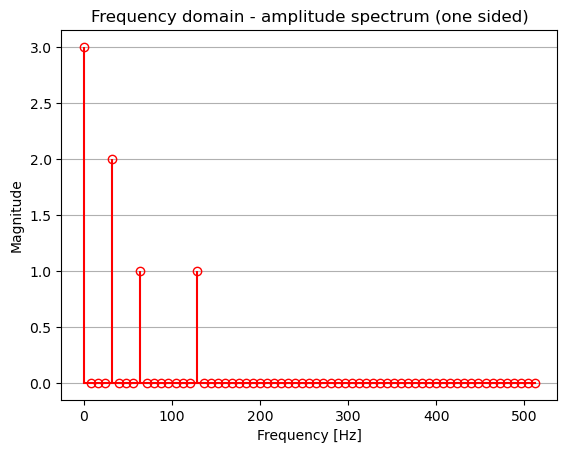

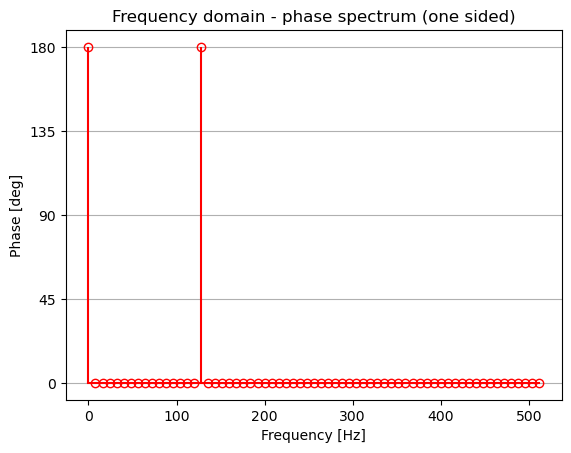

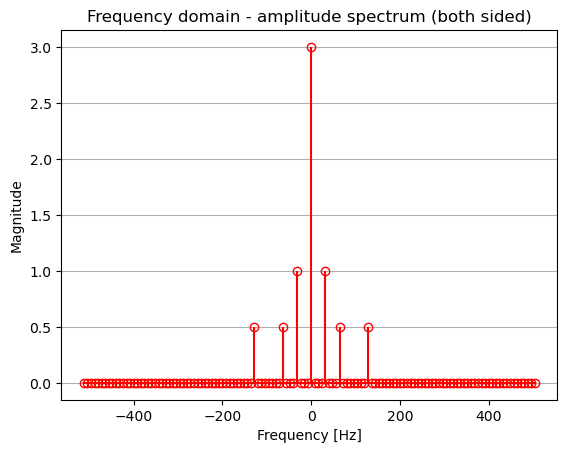

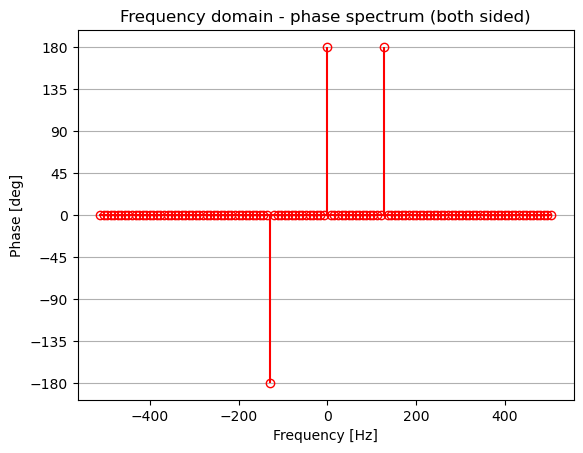

In [8]:
showOneSidedAmplitudePhaseSpectrum(signal, N, T)
bothSidedAmplitudePhaseSpectrum(signal, N, T)


# Amplitudové a fázové spektrum signalu se šumem

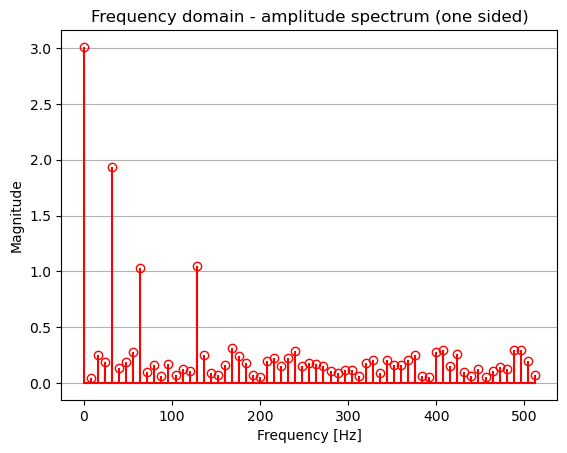

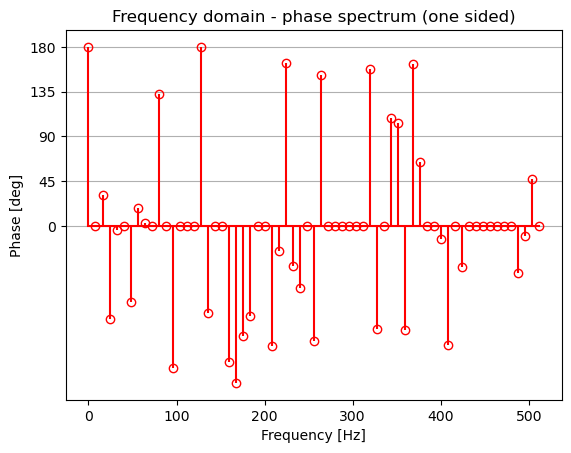

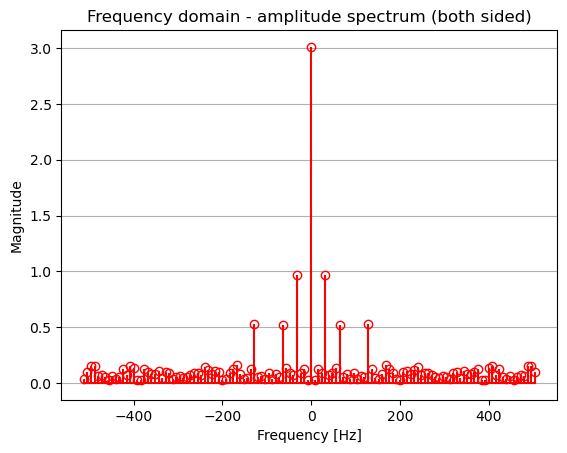

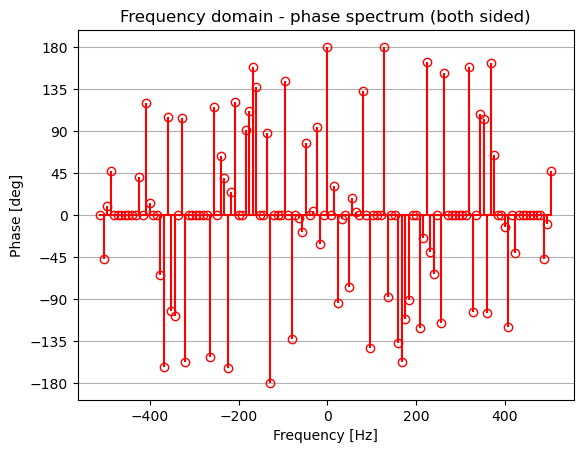

In [9]:
showOneSidedAmplitudePhaseSpectrum(noisy_signal, N, T)
bothSidedAmplitudePhaseSpectrum(noisy_signal, N, T)

# Závěr
V této úloze jsme nejdřive generovali harmonický signál složený ze stejnosměrné složky a tří harmonických složek o různých frekvencích a amplitudách. Tento signál byl navzorkován se vzorkovací frekvencí 1024 Hz a byl složen z celkem 128 vzorku.

Poté jsme provedli amplitudovou a frekvenční analýzu tohoto signálu. Nejprve jsme zobrazili vygenerovaný signál v časové oblasti. Poté jsme vypočítali a zobrazili jednostranné a oboustranné amplitudové a fázové spektrum signálu pomocí funkcí rfft fft z knihovny numpy.

V dalším kroku jsme přičetli k našému puvodnímu signálu šumový signál s normálním rozdělením, nulovou střední hodnotou a standardní odchylkou rovnou 1. Tento signál jsme poté opět analyzovali a porovnali jsme jeho spektra s původním signálem.

Přidání šumového signálu nejvýrazněji ovlivnilo fázové spektrum výsledného signálu. To je způsobeno tím, že k původnímu signálu bylo přidáno mnoho dalších náhodných neharmonických složek s různými amplitudami, frekvencemi a fázovými posuny. V důsledku toho ve frekvenčním spektru zanikají původní harmonické složky. Amplitudové spektrum signálu není nijak výrazně ovlivněno. To je způsobeno tím, že amplitudy náhodných signálů šumu jsou nízké a tak je stále možné ve spektru vidět harmonické složky původního signálu. Taktež je možne vidět, že přidaný šum mírně ovlivnil hodnoty harmonických složek.